In [1]:
from nearline_helpers import *
import json

Welcome to JupyROOT 6.26/10


---

In [2]:
outfile = './pedestal.json'

---

In [3]:
# calculate the odd,even pedestal difference from the root files

infiles = [
    # '../bin/run00207_00000.mid.root',
    # '../bin/run00233_00000.mid.root',
    # '../bin/*00300*root'
    '../bin/*418*root'
    # '../bin/no_jitter.root'
]

ch = r.TChain("tree")
for fi in infiles:
    ch.Add(fi)
ch.GetEntries()

23069

In [4]:
def do_even_odd_calc(w,offset=0,nsamples=20):
    # offset = 0
    diff = [w[i*2+offset]-w[i*2+1+offset] for i in range(nsamples)]
    return diff

In [5]:
diffs = {}
for e in ch:
    for x in e.waveforms_raw:
        # if(x.channelTag == 1 and x.amcNum == 1):
        # arr = np.array(x.trace) - x.trace[0]
        # plt.plot(arr)
        diff = do_even_odd_calc(x.trace, offset=0, nsamples=20)
        # print(np.mean(diff))
        key = (x.crateNum,x.amcNum,x.channelTag)
        if(key in diffs):
            diffs[key].append(np.mean(diff))
        else:
            diffs[key] = [np.mean(diff)]
    # break
    # if(len(diffs[(0,1,0)]) > 10):
    #     break
print(diffs)

{(0, 1, 0): [1.95, 1.0, 2.3, 2.1, 1.15, 1.3, 1.6, 1.25, 3.0, 1.5, 0.7, 2.6, 1.4, 2.4, 0.85, 2.1, 2.05, 1.3, 1.45, 2.0, 1.85, 2.15, 2.2, 0.75, 1.2, 2.1, 1.6, 1.4, 2.7, 2.65, 1.75, 0.5, 0.9, 0.9, 3.15, 2.3, 1.45, 1.4, 2.05, 1.75, 2.25, 2.35, 1.35, 2.0, 1.3, 1.75, 1.7, 1.9, 0.9, 1.55, 1.6, 1.75, 1.6, 1.6, 1.8, 2.5, 1.55, 1.35, 1.6, 2.3, 1.7, 1.75, 1.8, 2.2, 2.0, 1.95, 1.55, 1.25, 1.8, 1.8, 1.5, 2.65, 2.65, 3.05, 1.85, 2.1, 1.75, 1.8, 2.15, 1.35, 2.15, 2.05, 1.95, 1.6, 1.0, 2.4, 2.4, 2.1, 1.55, 1.7, 1.95, 1.65, 1.35, 2.5, 1.95, 0.45, 1.1, 2.8, 2.0, 2.05, 2.55, 0.9, 1.9, 0.75, 2.45, 1.7, 2.1, 2.3, 1.6, 1.65, 1.85, 1.45, 2.6, 0.45, 2.5, 2.75, 0.9, 1.45, 2.7, 1.4, 1.85, 2.15, 2.35, 1.5, 1.1, 0.65, 1.2, 1.95, 0.95, 1.85, 1.45, 1.65, 1.35, 0.95, 1.2, 2.15, 1.65, 1.0, 2.4, 2.2, 1.75, 1.45, 1.35, 1.75, 2.05, 1.9, 1.65, 2.0, 1.35, 1.8, 0.85, 1.85, 1.95, 1.85, 2.8, 1.65, 2.05, 2.1, 0.75, 1.75, 1.75, 2.75, 2.1, 1.95, 1.6, 1.6, 0.75, 1.3, 2.2, 1.75, 0.65, 2.35, 2.1, 1.9, 2.0, 1.85, 1.8, 1.05, 2.25, 2

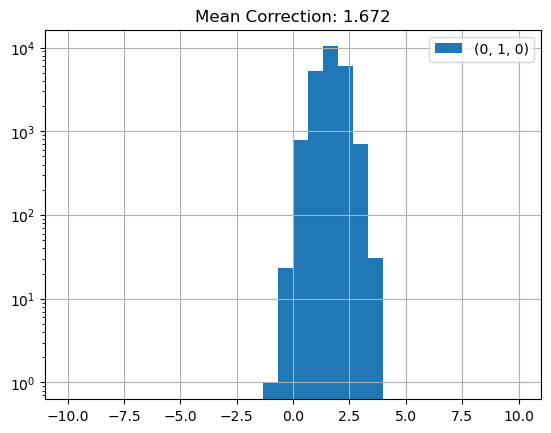

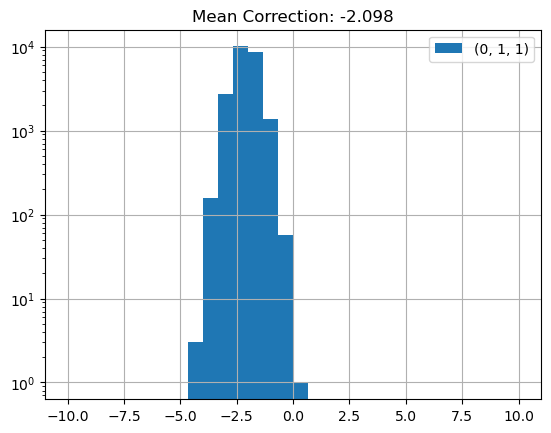

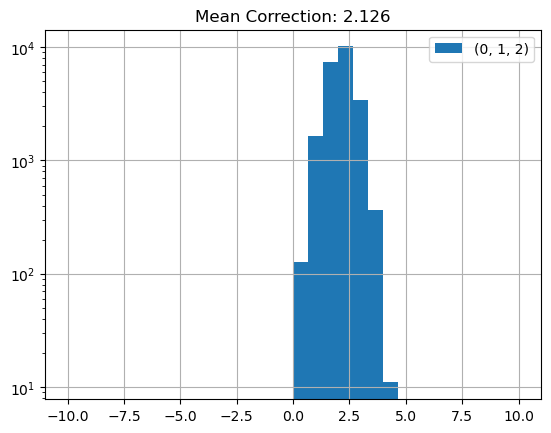

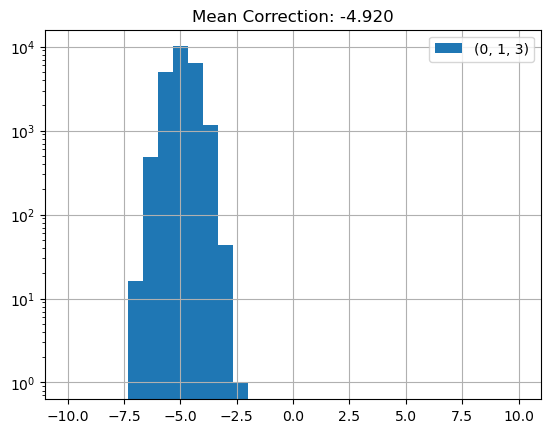

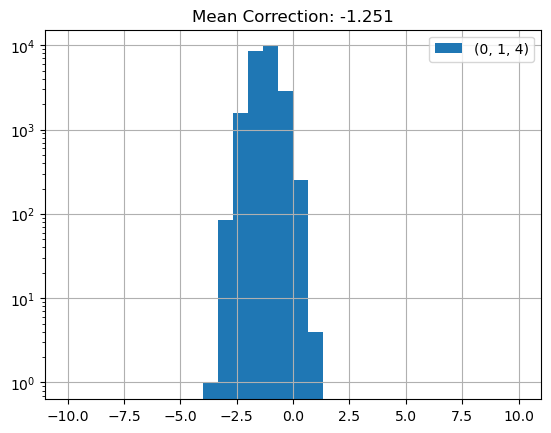

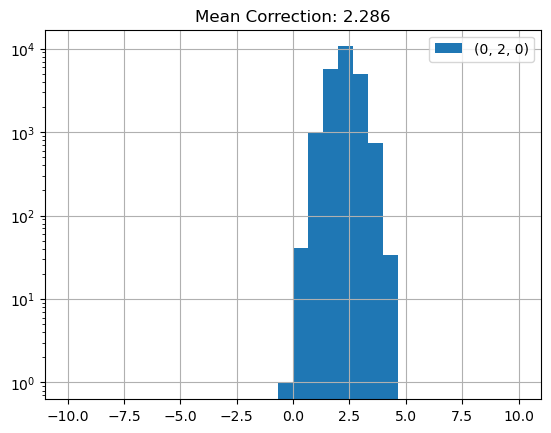

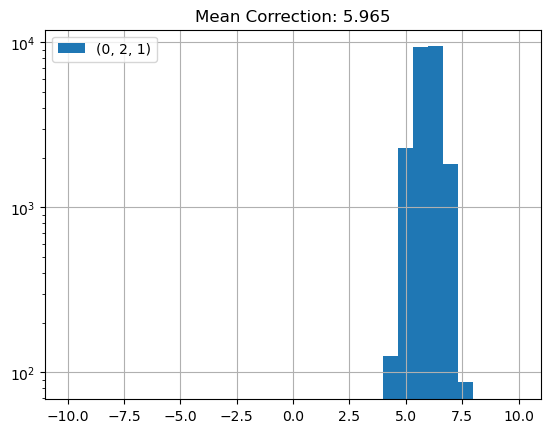

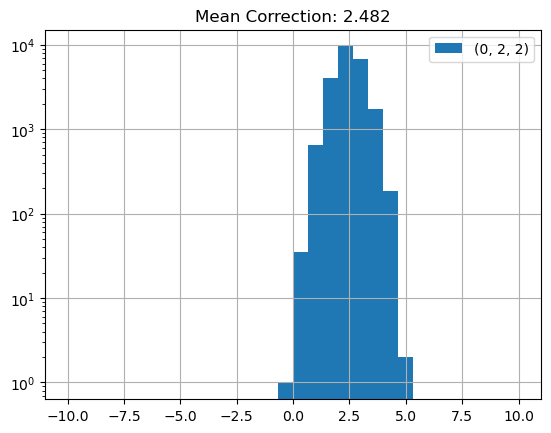

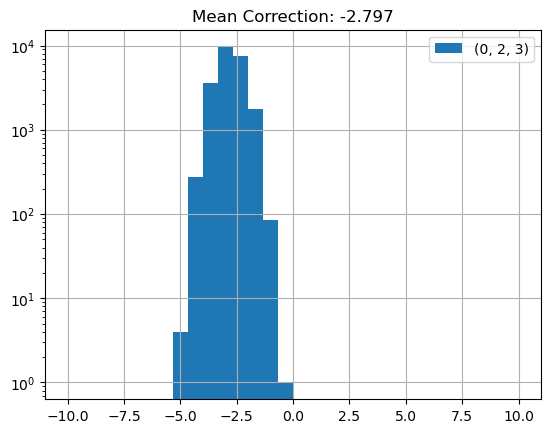

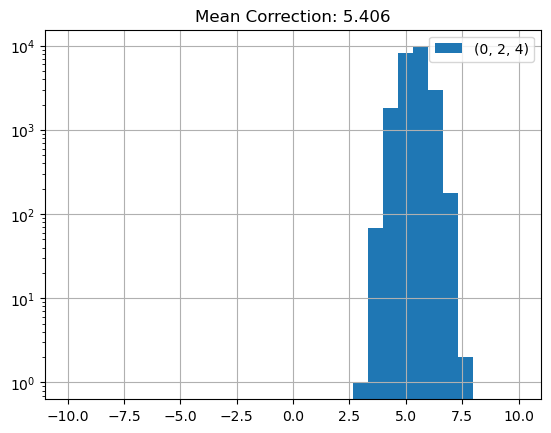

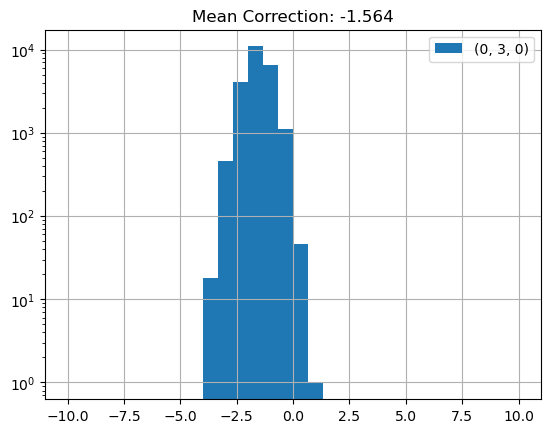

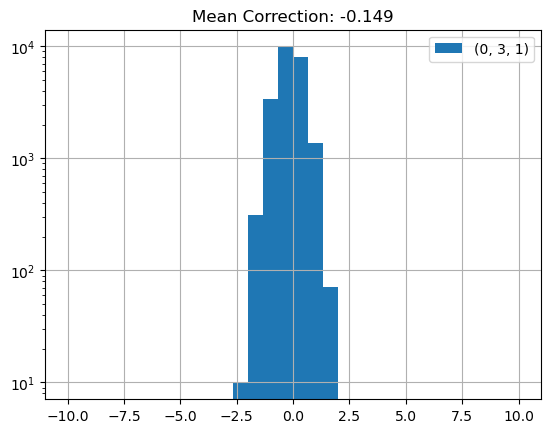

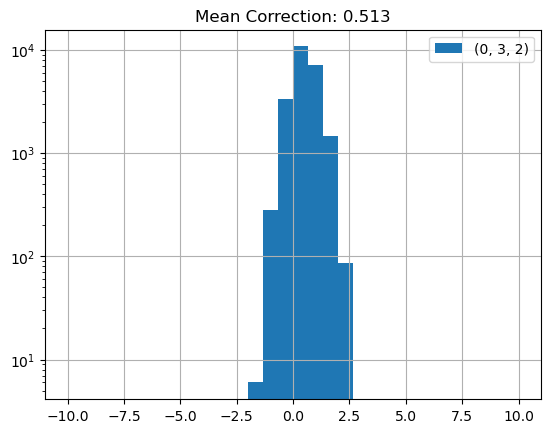

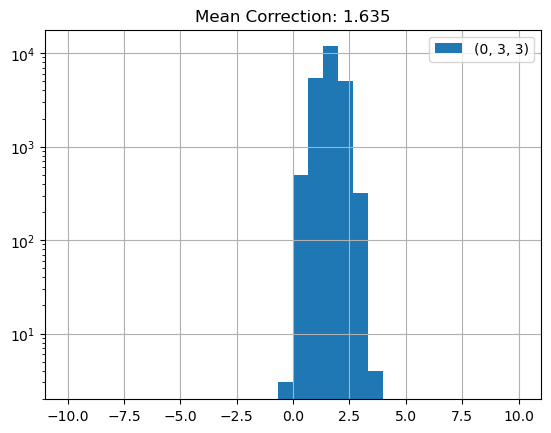

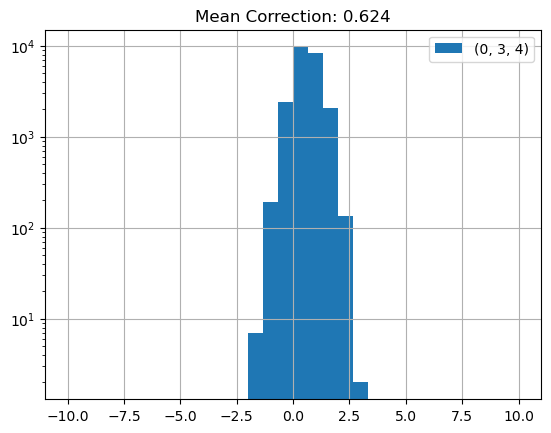

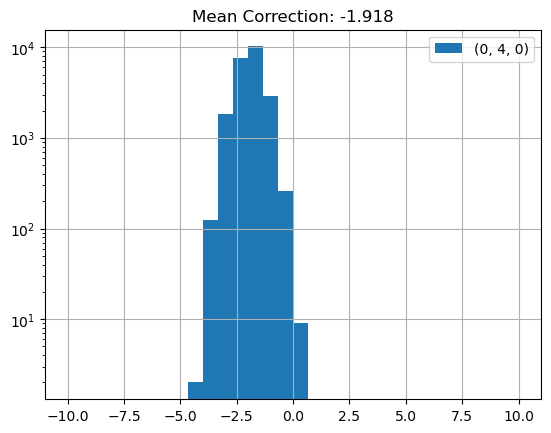

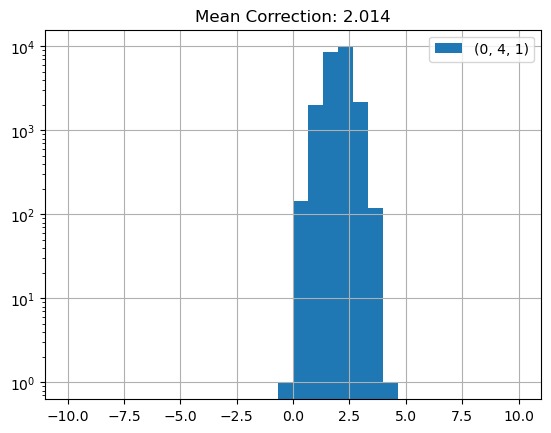

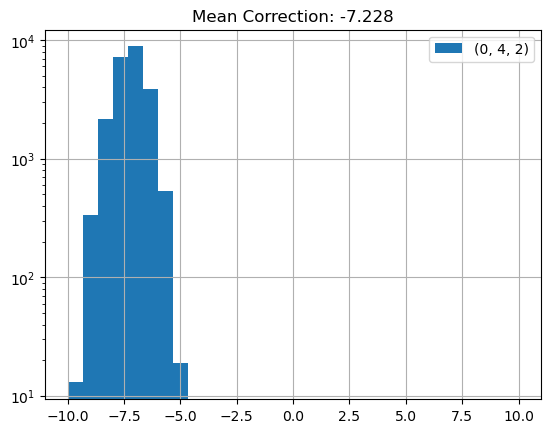

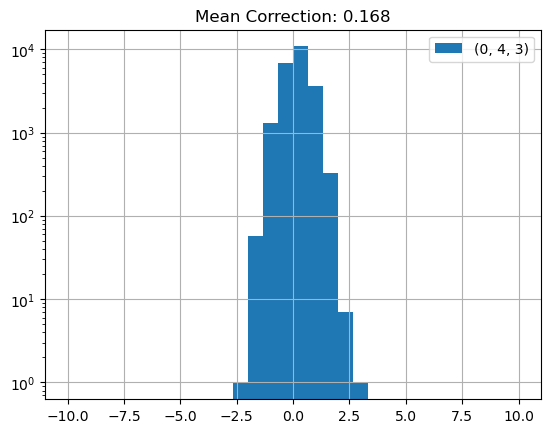

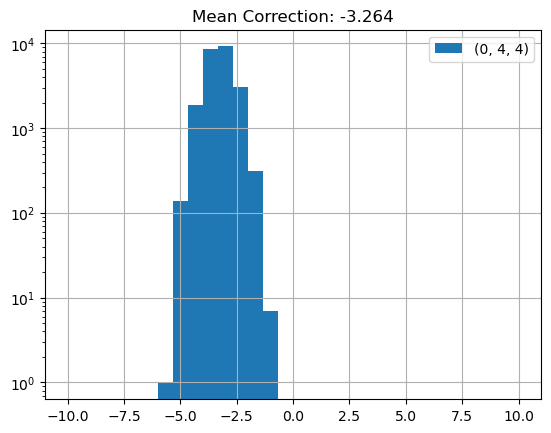

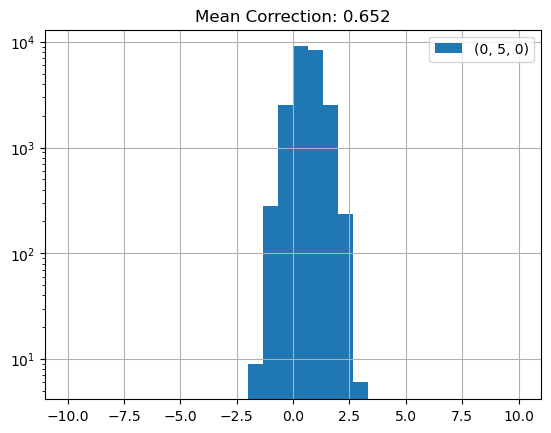

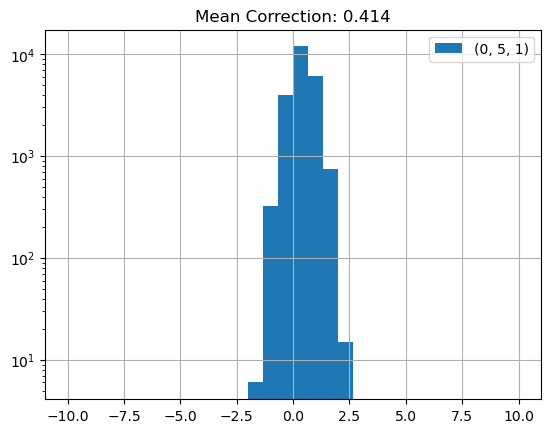

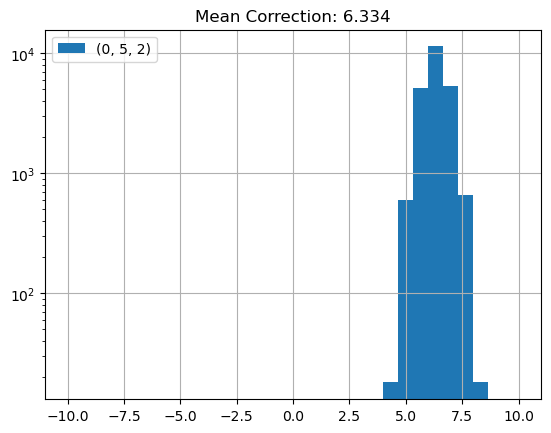

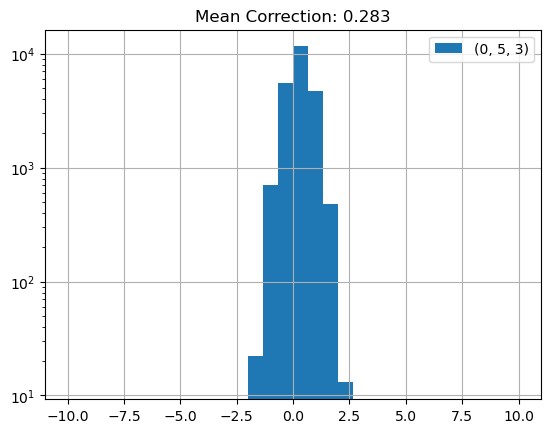

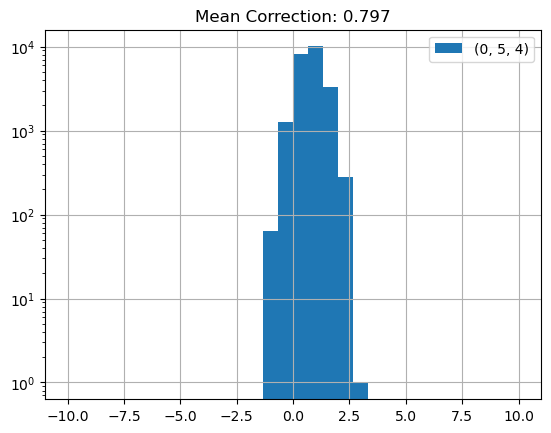

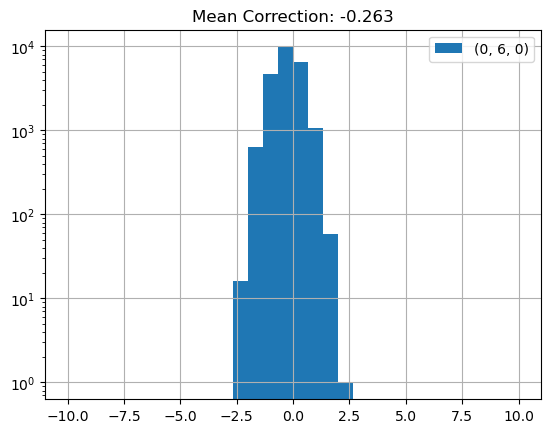

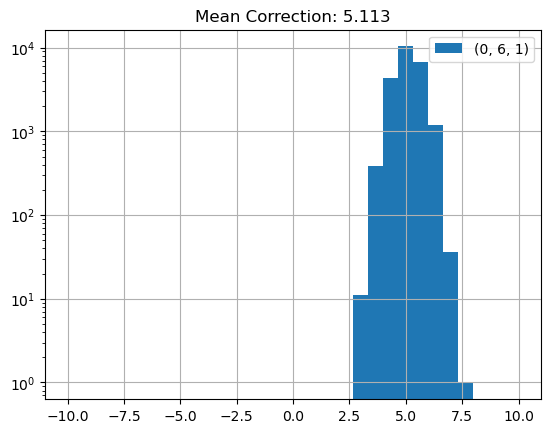

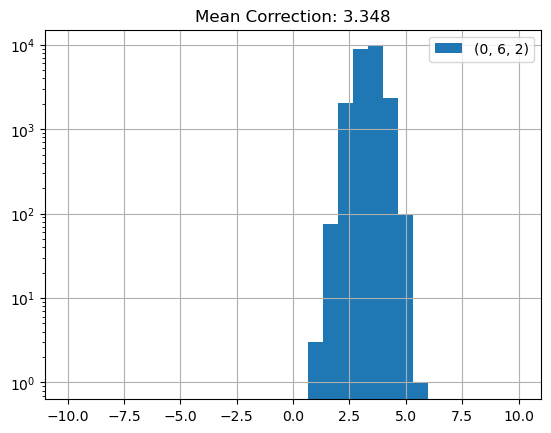

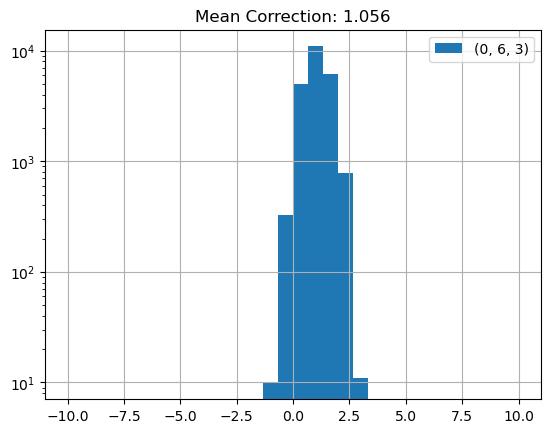

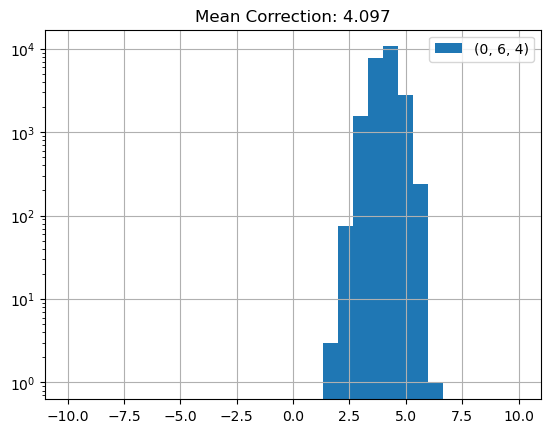

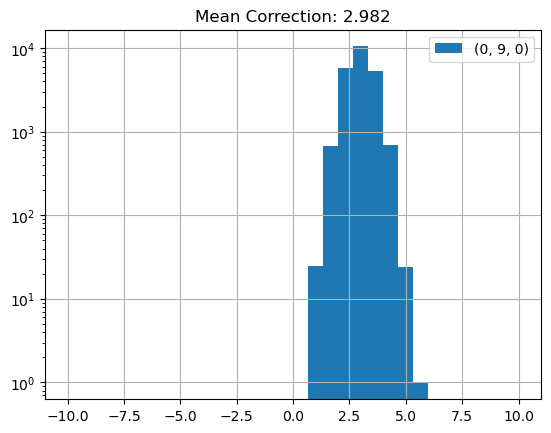

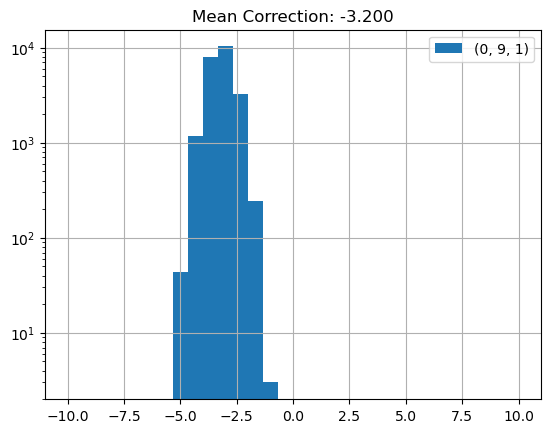

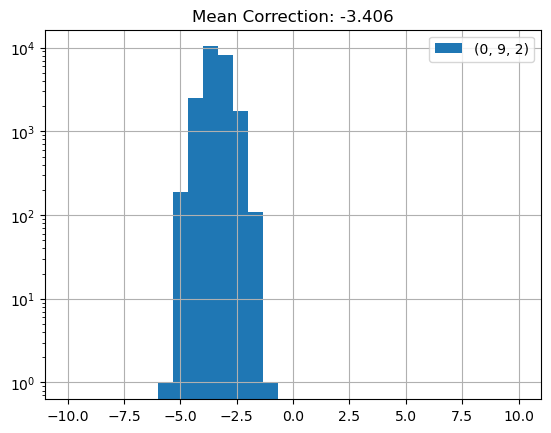

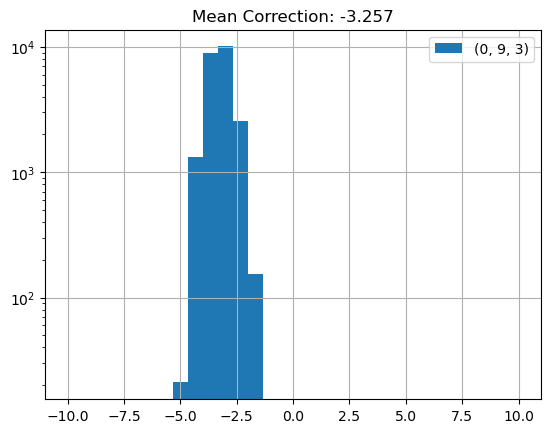

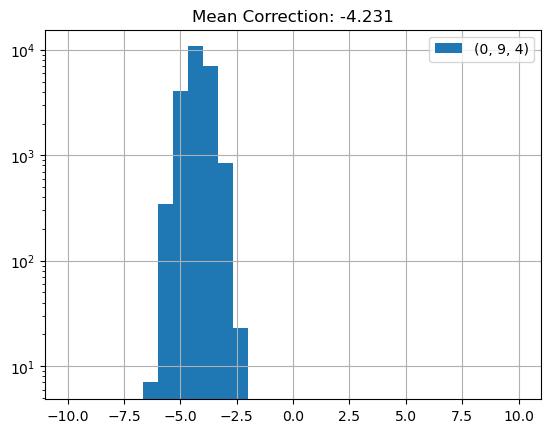

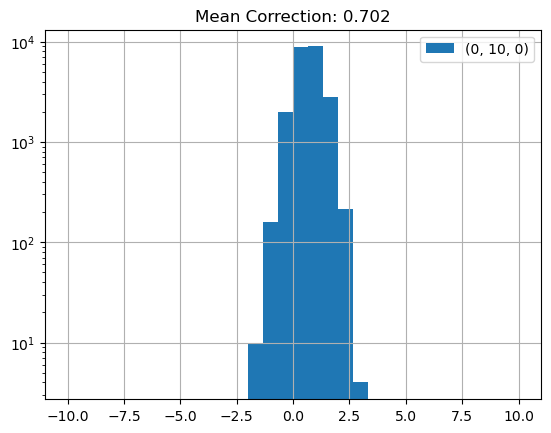

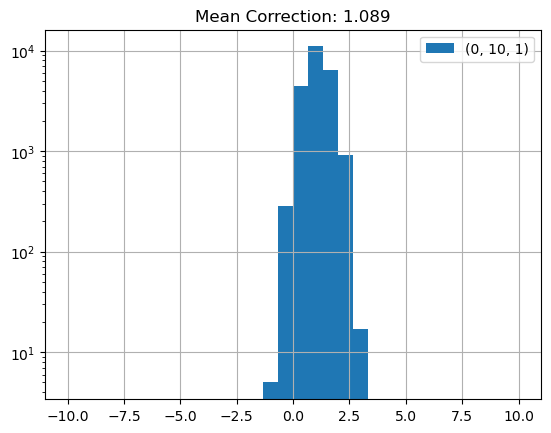

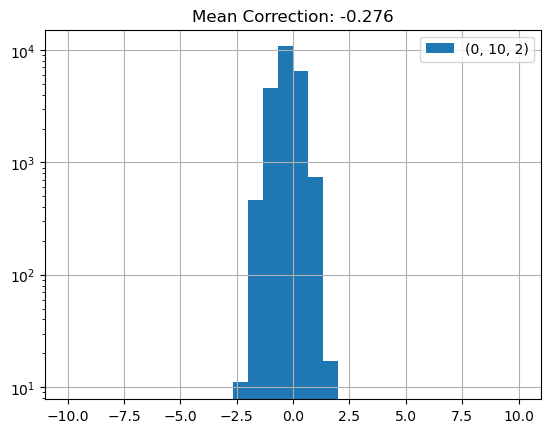

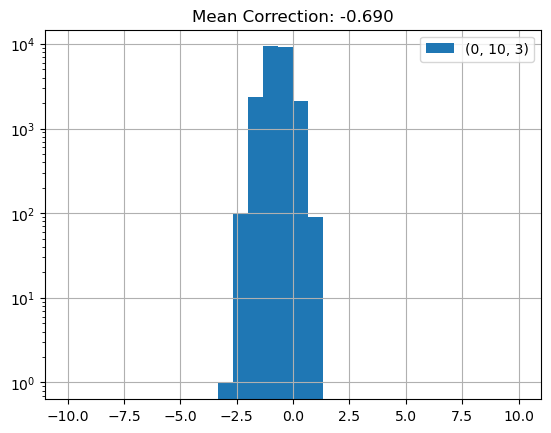

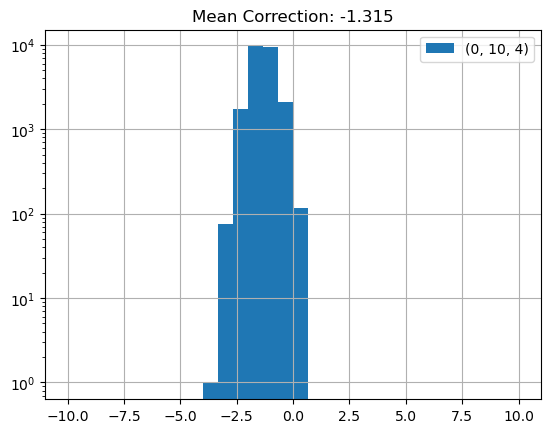

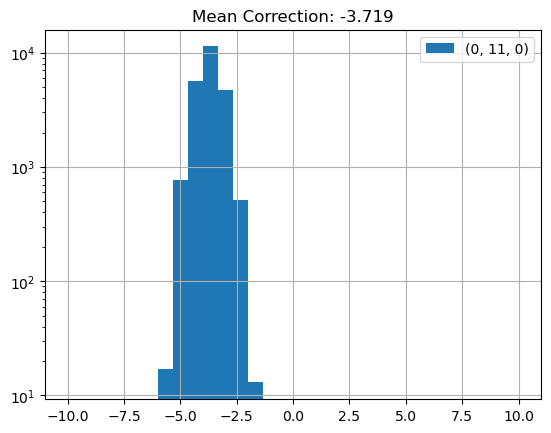

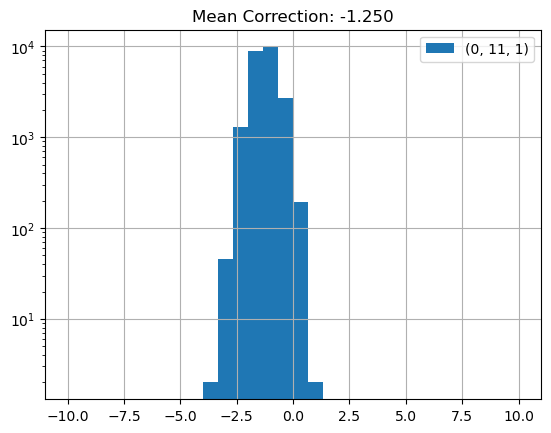

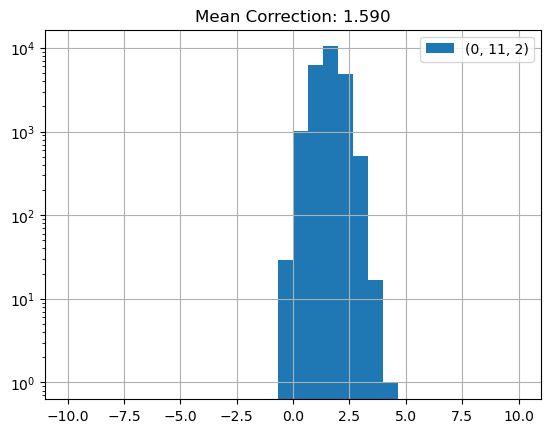

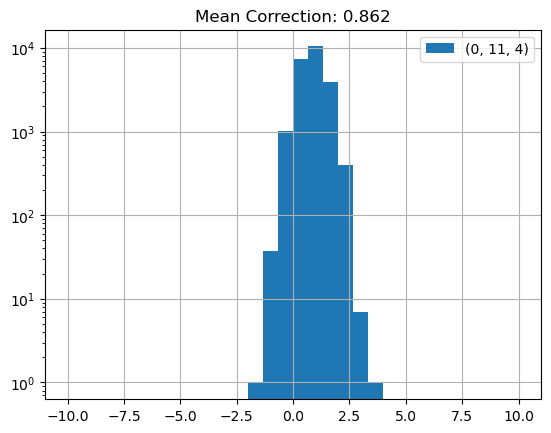

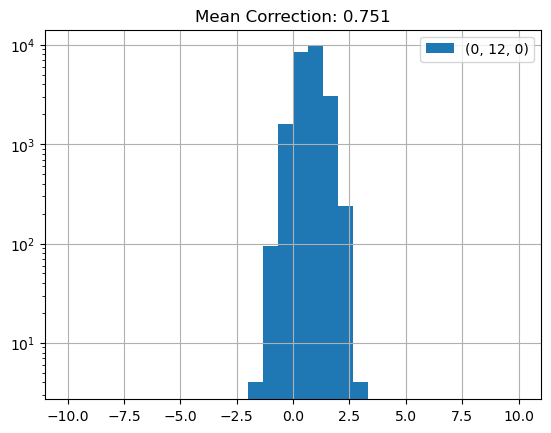

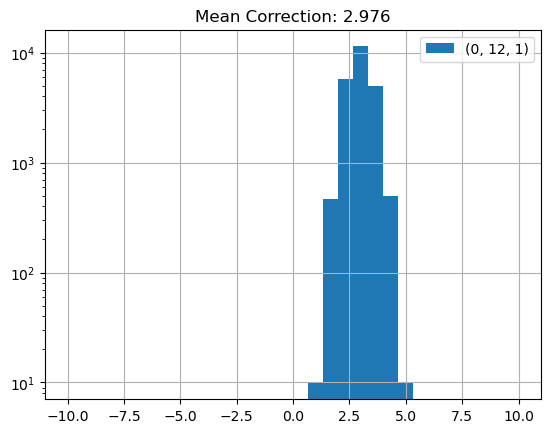

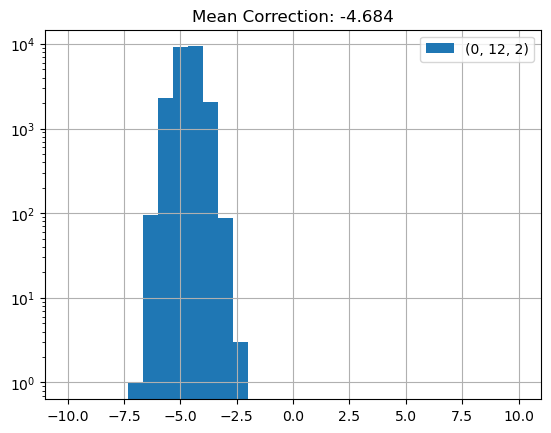

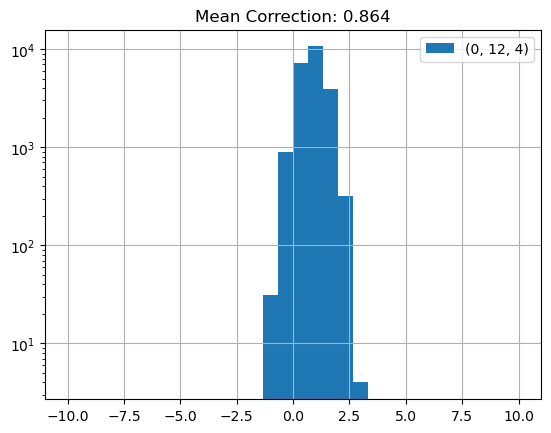

In [6]:
for key in diffs:
    
    plt.hist(diffs[key],bins=30,range=(-10,10),label=f'{key}')
    plt.title(f'Mean Correction: {np.mean(diffs[key]):.3f}')
    plt.legend()
    plt.yscale("log")
    plt.grid()
    plt.show()

---

In [8]:
{x:np.mean(y) for x,y in diffs.items()}

{(0, 1, 0): 1.6722841165250564,
 (0, 1, 1): -2.0979387029651466,
 (0, 1, 2): 2.126049072307959,
 (0, 1, 3): -4.919897693774926,
 (0, 1, 4): -1.2512333102132824,
 (0, 2, 0): 2.285854863880701,
 (0, 2, 1): 5.964897260273973,
 (0, 2, 2): 2.4822286284029826,
 (0, 2, 3): -2.7965384948846888,
 (0, 2, 4): 5.405733050112711,
 (0, 3, 0): -1.564305531472169,
 (0, 3, 1): -0.14870383214843072,
 (0, 3, 2): 0.5133214843072655,
 (0, 3, 3): 1.6347689439916768,
 (0, 3, 4): 0.6240289578637073,
 (0, 4, 0): -1.9181398474076643,
 (0, 4, 1): 2.0136877926131436,
 (0, 4, 2): -7.227783076122767,
 (0, 4, 3): 0.16767383388243456,
 (0, 4, 4): -3.264322871510317,
 (0, 5, 0): 0.6518857291486042,
 (0, 5, 1): 0.41387419802323566,
 (0, 5, 2): 6.334363620599966,
 (0, 5, 3): 0.2831194728628403,
 (0, 5, 4): 0.7971649037627883,
 (0, 6, 0): -0.262610542743194,
 (0, 6, 1): 5.1125411825906015,
 (0, 6, 2): 3.347546384602046,
 (0, 6, 3): 1.0561318709901162,
 (0, 6, 4): 4.0967574128663085,
 (0, 9, 0): 2.981823305011271,
 (0, 9,

---

In [9]:
#create the baseline file structure
# for (crate, amc,channel),diffi in diffs.items():
dicti = {'pedestals':[]}
for crate in [0]:
    for amc in range(1,13):
        for channel in range(5):
            diffi = diffs.get((crate,amc,channel),0.0)
            ped = np.mean(diffi)
            dicti['pedestals'].append({
                "crateNum":crate,
                "amcSlotNum":amc,
                "channelNum":channel,
                # "pedestal_raw":round(ped,3),
                "pedestal":round(ped,0),
                # "pedestal":0.,
            })


with open(outfile, 'w') as fout:
    json.dump(dicti, fout, indent=3)

In [10]:
# combine with the detector mapping file
mapping_file = '../bin/detector_mapping.json'
with open(mapping_file,'r') as fin:
    detmap = json.load(fin)
detmap['pedestals'] = dicti['pedestals']
with open(mapping_file,'w') as fin:
    json.dump(detmap,fin,indent=3)

---

### inspect results

In [11]:
f = r.TFile("../bin/no_jitter.root")
t = f.Get('tree')


f2 = r.TFile("../bin/jitter.root")
t2 = f2.Get('tree')
t2.SetLineColor(2)

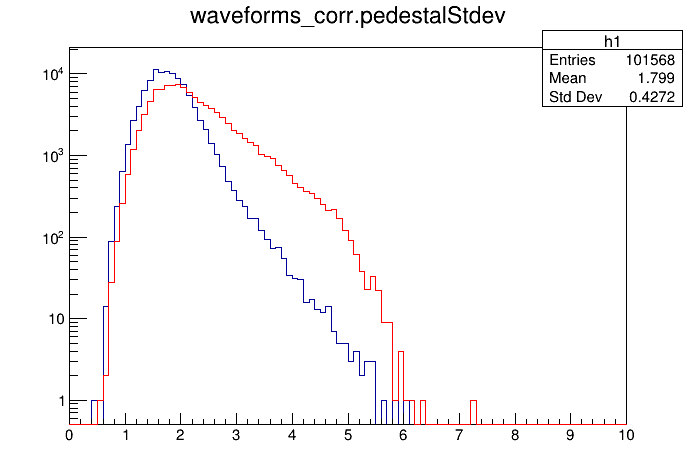

In [13]:
c = r.TCanvas()
t.Draw("waveforms_corr.pedestalStdev>>h1(100,0,10)")
t2.Draw("waveforms_corr.pedestalStdev>>h2(100,0,10)","","same")
c.SetLogy()
c.Draw()

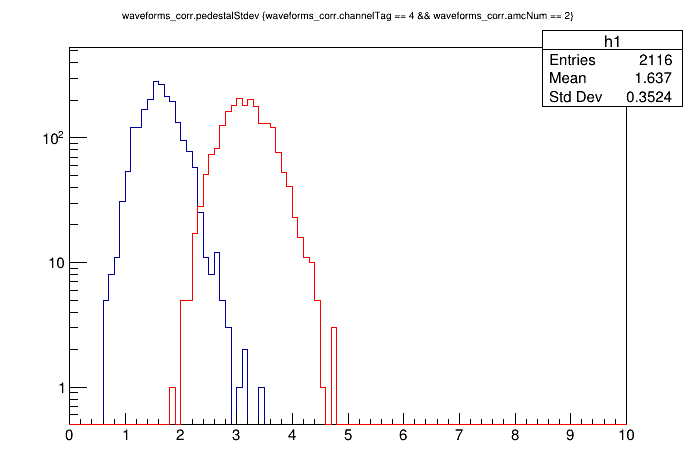

In [28]:
amc=2
channel = 4
c = r.TCanvas()
t.Draw("waveforms_corr.pedestalStdev>>h1(100,0,10)",f"waveforms_corr.channelTag == {channel} && waveforms_corr.amcNum == {amc}","")
t2.Draw("waveforms_corr.pedestalStdev>>h2(100,0,10)",f"waveforms_corr.channelTag == {channel} && waveforms_corr.amcNum == {amc}","same")
c.SetLogy()
c.Draw()

In [42]:
h = hist.Hist(
    hist.axis.IntCategory(range(5),label='Channel Number'),
    hist.axis.IntCategory(range(13),label='AMC Number'),
    hist.axis.Boolean(label='Corrected'),
    hist.axis.Regular(100,0,10,label='Pedestal stdev'),
)

for i, e in enumerate(t):
    for wfi in e.waveforms_corr:
        h.fill(wfi.channelTag, wfi.amcNum, False, wfi.pedestalStdev)

for i, e in enumerate(t2):
    for wfi in e.waveforms_corr:
        h.fill(wfi.channelTag, wfi.amcNum, True, wfi.pedestalStdev)

In [43]:
h

Hist(
  IntCategory([0, 1, 2, 3, 4], label='Channel Number'),
  IntCategory([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], label='AMC Number'),
  Boolean(label='Corrected'),
  Regular(100, 0, 10, label='Pedestal stdev'),
  storage=Double()) # Sum: 203136.0

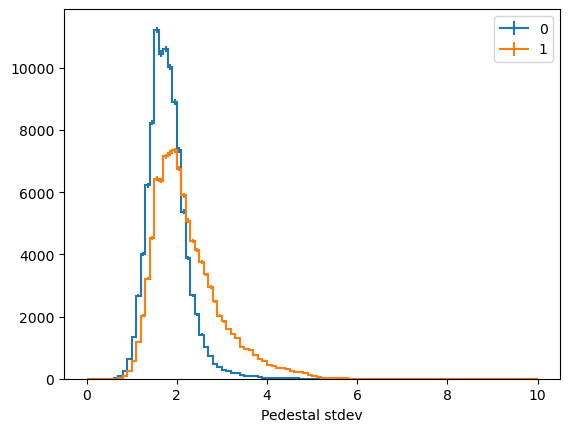

In [44]:
h.project(2,3).stack(0).plot()
plt.legend()
plt.show()

In [45]:
channel,amc

(0, 5)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f292bc004d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f292549ca90>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

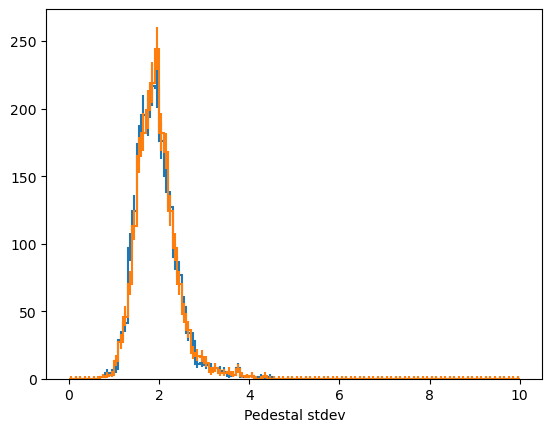

In [48]:
h[hist.loc(channel), hist.loc(amc),...].stack(0).plot()

/home/jlab/miniconda3/envs/gm2_11/lib/python3.11/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/home/jlab/miniconda3/envs/gm2_11/lib/python3.11/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/home/jlab/miniconda3/envs/gm2_11/lib/python3.11/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/home/jlab/miniconda3/envs/gm2_11/lib/python3.11/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/home/jlab/miniconda3/envs/gm2_11/lib/python3.11/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/home/jlab/miniconda3/envs/gm2_11/lib/python3.11/site-packages/mplhep/error_esti

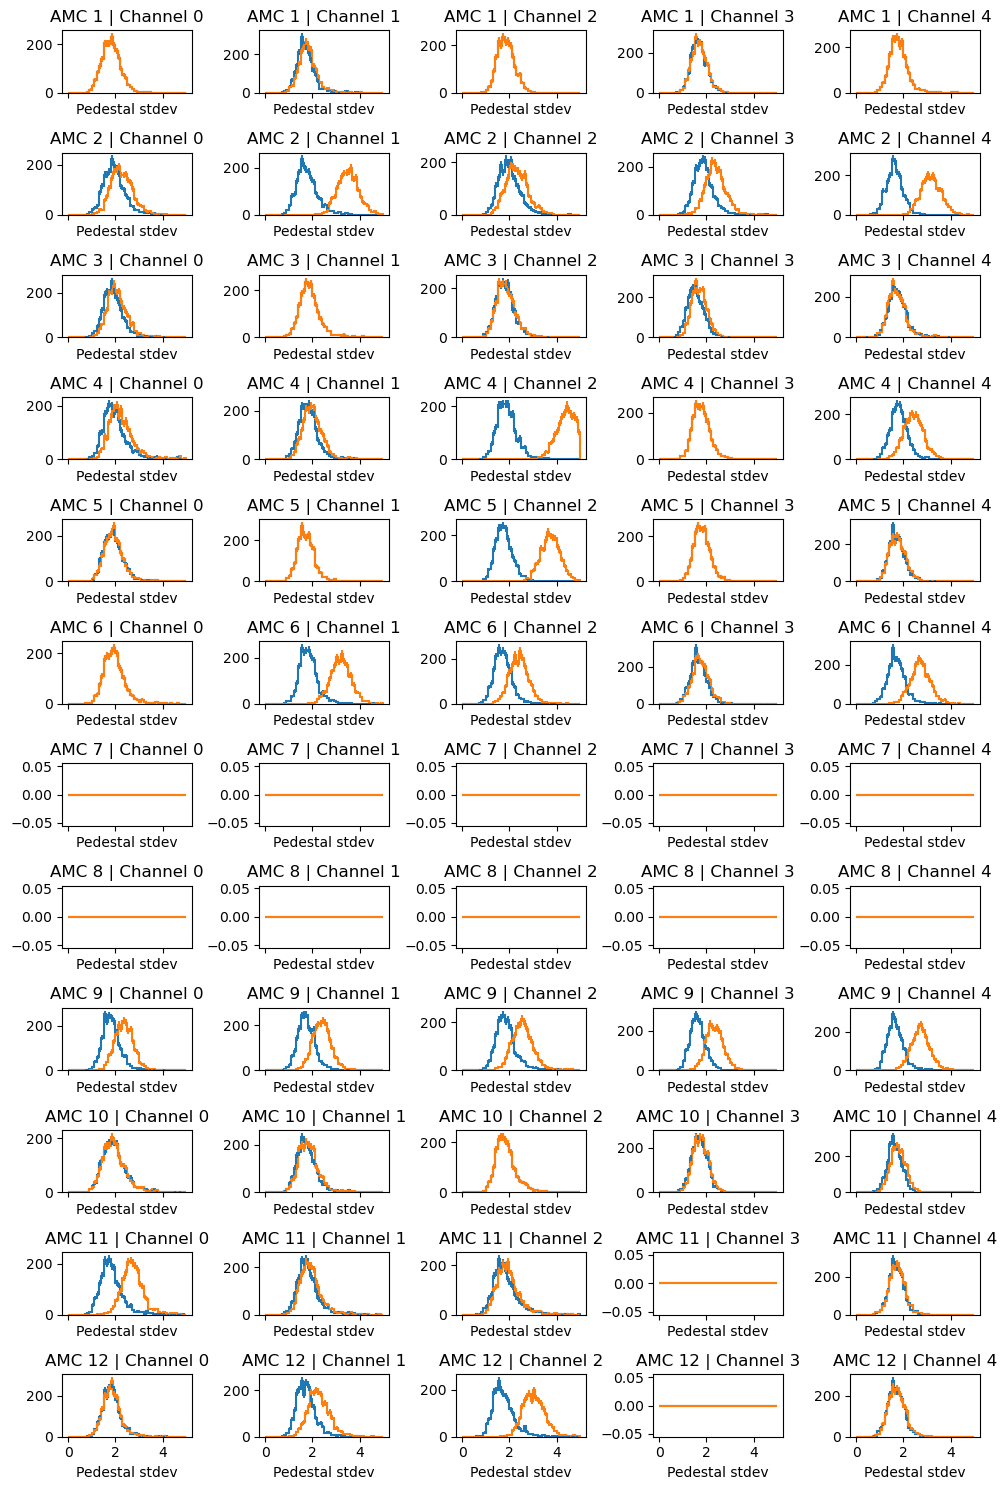

In [51]:
fig,ax = plt.subplots(12,5, figsize=(10,15),sharex=True)#,sharey=True)
for channel in range(5):
    for amc in range(1,13):
        axi = ax[amc-1,channel]
        axi.set_title(f'AMC {amc} | Channel {channel}')
        h[hist.loc(channel), hist.loc(amc),:,:5j].stack(0).plot(ax=axi)
plt.tight_layout()
plt.show()

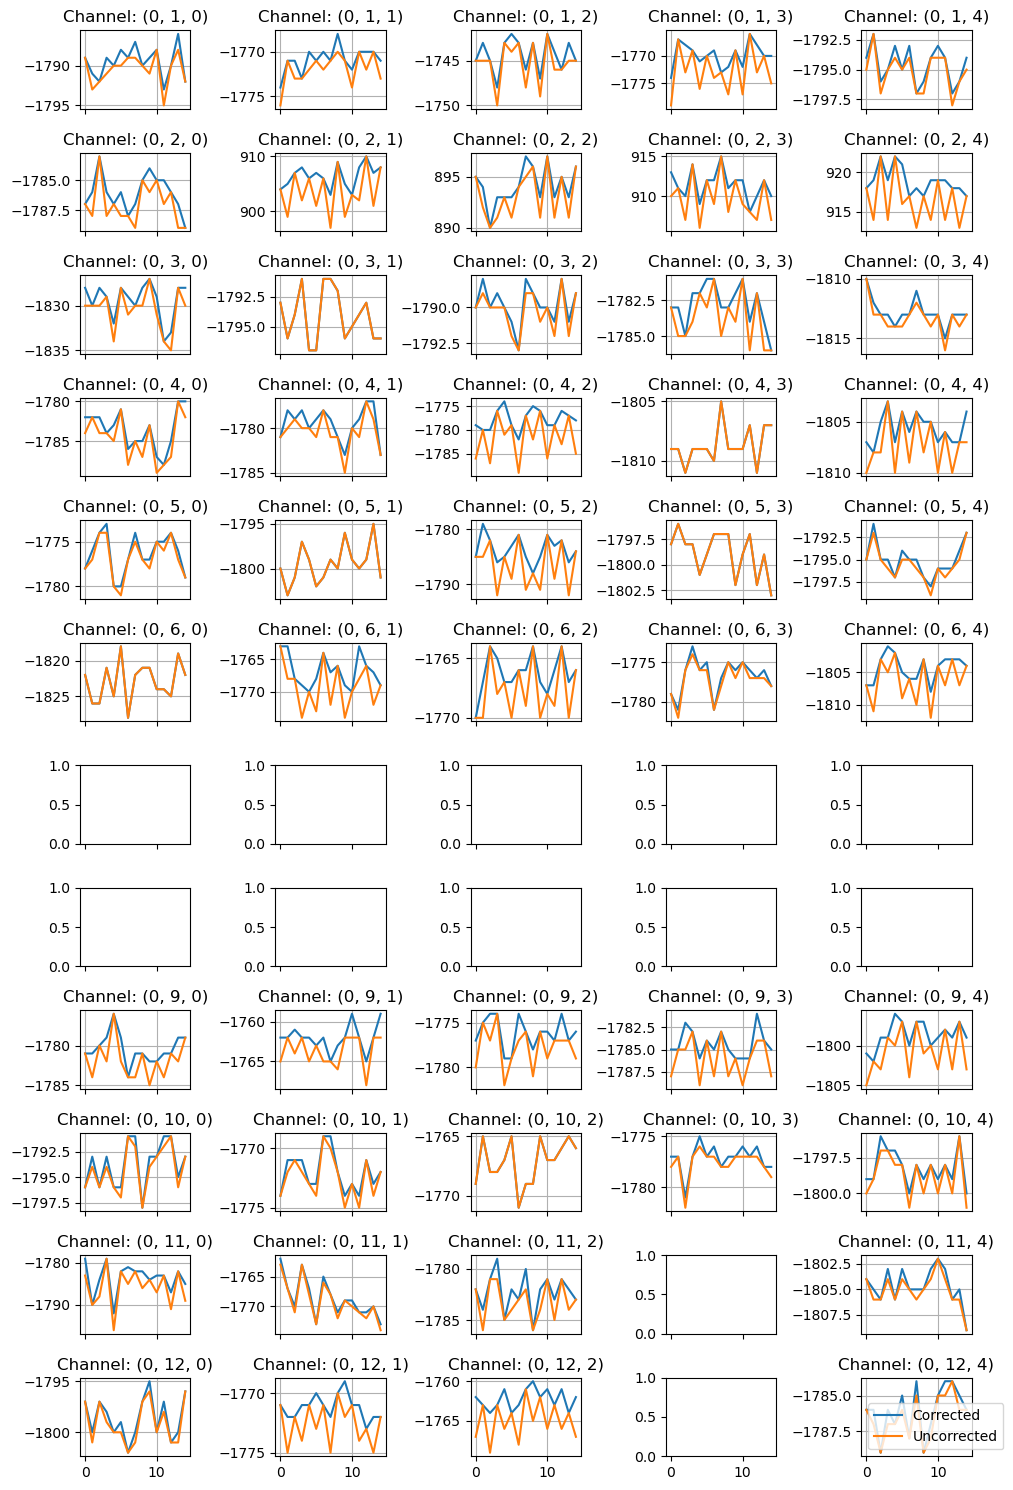

In [26]:
limit = 15
for entry in range(5):
    t.GetEntry(entry)
    fig,ax = plt.subplots(12,5, figsize=(10,15),sharex=True)#,sharey=True)
    for i, wfi in enumerate(t.waveforms_corr):
        axi = ax[wfi.amcNum-1, wfi.channelTag]
        plt.sca(axi)
        wfi2 = t.waveforms_raw[i]
        channel = (wfi.crateNum, wfi.amcNum, wfi.channelTag)
        correction = np.mean(diffs[channel])
        corr_vec = [0. if (i % 2 == 1) else correction for i in range(len(wfi.trace))]
        # print(corr_vec[:limit])
        plt.plot(wfi.trace[:limit],label='Corrected')
        # plt.plot(np.array(wfi.trace[:limit], dtype=float) - corr_vec[:limit],label='Corrected [Manual]')
        plt.plot(wfi2.trace[:limit],label='Uncorrected')
        axi.set_title(f'Channel: {channel}')
        axi.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()
    break

In [ ]:
f = r.TFile("../bin/no_jitter.root")
t = f.Get('tree')


f2 = r.TFile("../bin/jitter.root")
t2 = f2.Get('tree')
t2.SetLineColor(2)

In [ ]:
c = r.TCanvas()
t.Draw("waveforms.pedestalStdev>>h1(100,0,10)")
t2.Draw("waveforms.pedestalStdev>>h2(100,0,10)","","same")
c.SetLogy()
c.Draw()

In [ ]:
c = r.TCanvas()
t.Draw("waveforms.pedestalStdev>>h1(100,0,10)","waveform.channelTag == 1","")
t2.Draw("waveforms.pedestalStdev>>h2(100,0,10)","waveform.channelTag == 1","same")
c.SetLogy()
c.Draw()

In [ ]:
t.GetEntry(0)
t.waveforms.size()

In [ ]:
limit = -1
for entry in range(5):
    t.GetEntry(entry)
    fig,ax = plt.subplots(1,len(t.waveforms), figsize=(len(t.waveforms)*5,5))
    for i, wfi in enumerate(t.waveforms):
        axi = ax[i]
        plt.sca(axi)
        wfi2 = t.waveforms_raw[i]
        channel = (wfi.crateNum, wfi.amcNum, wfi.channelTag)
        correction = np.mean(diffs[channel])
        corr_vec = [0. if (i % 2 == 1) else correction for i in range(len(wfi.trace))]
        print(corr_vec[:limit])
        plt.plot(wfi.trace[:limit],label='Corrected')
        plt.plot(np.array(wfi.trace[:limit], dtype=float) - corr_vec[:limit],label='Corrected [Manual]')
        plt.plot(wfi2.trace[:limit],label='Uncorrected')
        axi.set_title(f'Channel: {channel}')
        axi.grid()
    plt.legend()
    plt.show()